In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import linregress
from HandyFunctions import calc_scale_height, convert_rprs_to_rpJ

In [27]:
## WASP-96 b results
# load in result npz for LD scenario A (should be same as above)
resA = np.load('output_arrays/synth_scatter50_ahead10000LDscenAkeyoutputs.npz')
fasymA, tdiffA_s, tdifferrA_s = resA['fasyms'], resA['tdiff_seconds'], resA['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resB = np.load('output_arrays/synth_scatter50_ahead10000LDscenBkeyoutputs.npz')
fasymB, tdiffB_s, tdifferrB_s = resB['fasyms'], resB['tdiff_seconds'], resB['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resC = np.load('output_arrays/synth_scatter50_ahead10000LDscenCkeyoutputs.npz')
fasymC, tdiffC_s, tdifferrC_s = resC['fasyms'], resC['tdiff_seconds'], resC['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

## WASP-107 b results
resAw107 = np.load('output_arrays/wasp107b_synth_scatter50_ahead10000LDscenAkeyoutputs.npz')
fasymAw107, tdiffAw107_s, tdifferrAw107_s = resAw107['fasyms'], resAw107['tdiff_seconds'], resAw107['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resBw107 = np.load('output_arrays/wasp107b_synth_scatter50_ahead10000LDscenBkeyoutputs.npz')
fasymBw107, tdiffBw107_s, tdifferrBw107_s = resBw107['fasyms'], resBw107['tdiff_seconds'], resBw107['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resCw107 = np.load('output_arrays/wasp107b_synth_scatter50_ahead10000LDscenCkeyoutputs.npz')
fasymCw107, tdiffCw107_s, tdifferrCw107_s = resCw107['fasyms'], resCw107['tdiff_seconds'], resCw107['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

## Gj 1214 b results
resAgj1214 = np.load('output_arrays/gj1214b_synth_scatter50_ahead10000LDscenAkeyoutputs.npz')
fasymAgj1214, tdiffAgj1214_s, tdifferrAgj1214_s = resAgj1214['fasyms'], resAgj1214['tdiff_seconds'], resAgj1214['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resBgj1214 = np.load('output_arrays/gj1214b_synth_scatter50_ahead10000LDscenBkeyoutputs.npz')
fasymBgj1214, tdiffBgj1214_s, tdifferrBgj1214_s = resBgj1214['fasyms'], resBgj1214['tdiff_seconds'], resBgj1214['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resCgj1214 = np.load('output_arrays/gj1214b_synth_scatter50_ahead10000LDscenCkeyoutputs.npz')
fasymCgj1214, tdiffCgj1214_s, tdifferrCgj1214_s = resCgj1214['fasyms'], resCgj1214['tdiff_seconds'], resCgj1214['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

## wasp 39 b results
resAw39 = np.load('output_arrays/wasp39b_synth_scatter50_ahead10000LDscenAkeyoutputs.npz')
fasymAw39, tdiffAw39_s, tdifferrAw39_s = resAw39['fasyms'], resAw39['tdiff_seconds'], resAw39['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resBw39 = np.load('output_arrays/wasp39b_synth_scatter50_ahead10000LDscenBkeyoutputs.npz')
fasymBw39, tdiffBw39_s, tdifferrBw39_s = resBw39['fasyms'], resBw39['tdiff_seconds'], resBw39['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resCw39 = np.load('output_arrays/wasp39b_synth_scatter50_ahead10000LDscenCkeyoutputs.npz')
fasymCw39, tdiffCw39_s, tdifferrCw39_s = resCw39['fasyms'], resCw39['tdiff_seconds'], resCw39['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

# np.savez(output_arr_name,
#         fasyms=fasym_arr,
#         tdiff_seconds=t0_diff_seconds_arr, tdiff_err_seconds=t0_diff_seconds_err_arr,
#         chi2red_homog=chi2red_homog_arr, chi2red_asym=chi2red_asym_arr)

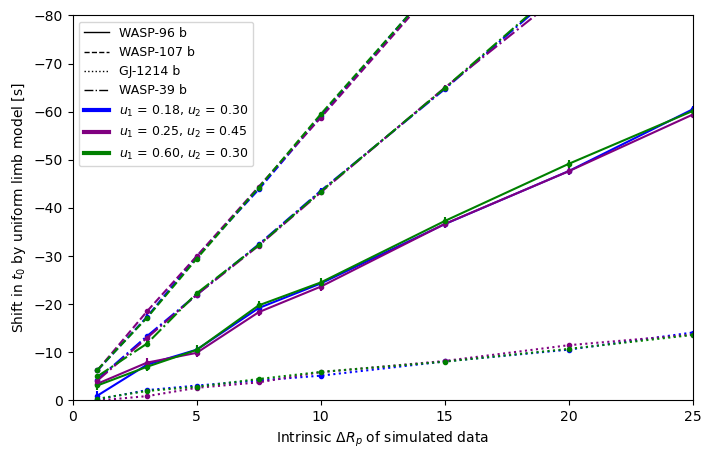

In [39]:
## plotting the different LD scenarios
fig, ax = plt.subplots(figsize=(8,5))

## WASP-96 b:
# LD scenario A 
ax.errorbar(fasymA, tdiffA_s, tdifferrA_s, ls='solid', marker='o', ms=3, c='blue', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# LD scenario B
ax.errorbar(fasymB, tdiffB_s, tdifferrB_s, ls='solid', marker='o', ms=3, c='purple', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# LD scenario C
ax.errorbar(fasymC, tdiffC_s, tdifferrC_s, ls='solid', marker='o', ms=3, c='green', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

## WASP-107 b:
# LD scenario A 
ax.errorbar(fasymAw107, tdiffAw107_s, tdifferrAw107_s, ls='--', marker='o', ms=3, c='blue')
# LD scenario B
ax.errorbar(fasymBw107, tdiffBw107_s, tdifferrBw107_s, ls='--', marker='o', ms=3, c='purple')
# LD scenario C
ax.errorbar(fasymCw107, tdiffCw107_s, tdifferrCw107_s, ls='--', marker='o', ms=3, c='green')

## GJ 1214 b:
# LD scenario A 
ax.errorbar(fasymAgj1214, tdiffAgj1214_s, tdifferrAgj1214_s, ls='dotted', marker='o', ms=3, c='blue')
# LD scenario B
ax.errorbar(fasymBgj1214, tdiffBgj1214_s, tdifferrBgj1214_s, ls='dotted', marker='o', ms=3, c='purple')
# LD scenario C
ax.errorbar(fasymCgj1214, tdiffCgj1214_s, tdifferrCgj1214_s, ls='dotted', marker='o', ms=3, c='green')

## wasp 39 b:
# LD scenario A 
ax.errorbar(fasymAw39, tdiffAw39_s, tdifferrAw39_s, ls='dashdot', marker='o', ms=3, c='blue')
# LD scenario B
ax.errorbar(fasymBw39, tdiffBw39_s, tdifferrBw39_s, ls='dashdot', marker='o', ms=3, c='purple')
# LD scenario C
ax.errorbar(fasymCw39, tdiffCw39_s, tdifferrCw39_s, ls='dashdot', marker='o', ms=3, c='green')


custom_legend_lines = [Line2D([0], [0], color='black', lw=1, ls='solid'), Line2D([0], [0], color='black', lw=1, ls='--'),
                       Line2D([0], [0], color='black', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', lw=1, ls='dashdot'),
                       Line2D([0],[0], color='blue', lw=3, ls='solid'), Line2D([0],[0], color='purple', lw=3, ls='solid'),
                       Line2D([0],[0], color='green', lw=3, ls='solid')
                      ]
custom_legend_labels = ['WASP-96 b', 'WASP-107 b', 'GJ-1214 b', 'WASP-39 b', '$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
#ax.text(0.01, 0.55, 'Scatter = 50 ppm', fontsize=9, transform=ax.transAxes)

ax.set(ylim=(0., -80.))
#ax.set(ylim=(-80., 0.))
ax.set(xlim=(0, 25))
ax.set(xlabel=r'Intrinsic $\Delta R_p$ of simulated data', ylabel=r'Shift in $t_0$ by uniform limb model [s]')
#ax.legend(loc='upper left', fontsize=9)
ax.legend(custom_legend_lines, custom_legend_labels, loc='upper left', markerscale=1, fontsize=9)
plt.savefig('analysis_figures/t0Rp_plot.png', dpi=350, bbox_inches='tight')
plt.show()

For each x (i.e. each intrinsic limb asymmetry size), the y-value is how much the uniform limb model's transit time needed to be shifted in order to mimic the asymmetric data as best as possible. This does not necessarily mean that the corresponding shift effectively mimicked the asymmetry, given the data's scatter. Nevertheless, each line provides a rough guide for planning observations. That is, in order to discern a given asymmetry size (x-value) in light of the asymmetry-timing degeneracy, you need to know the current transit time (and enforce strong priors!) to within a range equal to the y-value. 

Shallower slope = harder to detect asymmetry because you need very tight timing precision to detect even small asymmetries.

In [40]:
# Fitting these lines with a linear function
# (let's fit just LD scen A)
linfit_w96 = linregress(fasymA, tdiffA_s)
slope_w96, slope_err_w96 = linfit_w96.slope, linfit_w96.stderr
intcpt_w96, intcpt_err_w96 = linfit_w96.intercept, linfit_w96.intercept_stderr

linfit_w107 = linregress(fasymAw107, tdiffAw107_s)
slope_w107, slope_err_w107 = linfit_w107.slope, linfit_w107.stderr
intcpt_w107, intcpt_err_w107 = linfit_w107.intercept, linfit_w107.intercept_stderr

linfit_gj1214 = linregress(fasymAgj1214, tdiffAgj1214_s)
slope_gj1214, slope_err_gj1214 = linfit_gj1214.slope, linfit_gj1214.stderr
intcpt_gj1214, intcpt_err_gj1214 = linfit_gj1214.intercept, linfit_gj1214.intercept_stderr

linfit_w39 = linregress(fasymAw39, tdiffAw39_s)
slope_w39, slope_err_w39 = linfit_w39.slope, linfit_w39.stderr
intcpt_w39, intcpt_err_w39 = linfit_w39.intercept, linfit_w39.intercept_stderr

slopes = np.array([slope_gj1214, slope_w96, slope_w107, slope_w39])
slope_errs = np.array([slope_err_gj1214, slope_err_w96, slope_err_w107, slope_err_w39])

intcpts = np.array([intcpt_gj1214, intcpt_w96, intcpt_w107, intcpt_w39])
intcpt_errs = np.array([intcpt_err_gj1214, intcpt_err_w96, intcpt_err_w107, intcpt_err_w39])

In [41]:
## computing the scale heights as done in the simulations
M_w96, T_w96, RpRs_w96, Rs_w96, mu_w96 = 0.49, 1285., 0.1186, 1.15, 2.5
Rp1_w96 = convert_rprs_to_rpJ(RpRs_w96, Rs_w96)
H_w96 = calc_scale_height(T_w96, M_w96, Rp1_w96, mu_w96)

M_w107, T_w107, RpRs_w107, Rs_w107, mu_w107 = 0.096, 770., 0.14434, 0.73, 2.5
Rp1_w107 = convert_rprs_to_rpJ(RpRs_w107, Rs_w107)
H_w107 = calc_scale_height(T_w107, M_w107, Rp1_w107, mu_w107)

M_gj1214, T_gj1214, RpRs_gj1214, Rs_gj1214, mu_gj1214 = 0.0257, 596., 0.1160, 0.215, 5.0 ## note, i used wrong mmw for gj1214
Rp1_gj1214 = convert_rprs_to_rpJ(RpRs_gj1214, Rs_gj1214)
H_gj1214 = calc_scale_height(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214)

M_w39, T_w39, RpRs_w39, Rs_w39, mu_w39 = 0.281, 1166., 0.1457, 0.928, 2.5
Rp1_w39 = convert_rprs_to_rpJ(RpRs_w39, Rs_w39)
H_w39 = calc_scale_height(T_w39, M_w39, Rp1_w39, mu_w39)

scaleheights = np.array([H_gj1214, H_w96, H_w107, H_w39])
scaleheight_errs = 1.*np.ones((len(scaleheights)))

labels = np.array(['gj1214b', 'w96b', 'w107b', 'w39b'])

In [42]:
for i, planet in enumerate(labels):
    print(planet)
    print('H = %.1f km'%(scaleheights[i]))
    print('slope = %.3f +/- %.3f'%(slopes[i], slope_errs[i]))
    print('intcpt = %.3f +/- %.3f'%(intcpts[i], intcpt_errs[i]))

gj1214b
H = 87.0 km
slope = -0.540 +/- 0.006
intcpt = -0.085 +/- 0.152
w96b
H = 588.5 km
slope = -2.387 +/- 0.015
intcpt = -0.020 +/- 0.406
w107b
H = 1074.3 km
slope = -5.639 +/- 0.032
intcpt = -2.358 +/- 0.869
w39b
H = 915.2 km
slope = -4.257 +/- 0.011
intcpt = -0.820 +/- 0.291


In [31]:
sort_idxs = np.argsort(scaleheights)
linfit_H = linregress(scaleheights[sort_idxs], slopes[sort_idxs])
slopeH, slope_errH = linfit_H.slope, linfit_H.stderr
intcptH, intcpt_errH = linfit_H.intercept, linfit_H.intercept_stderr

x_fitH = np.linspace(min(scaleheights), max(scaleheights), 50)
y_fitH = slopeH * x_fitH + intcptH
yerr_fitH = np.zeros(len(y_fitH)) # assuming symmetric confidence intervals
for i_x, x in enumerate(x_fitH):
    errx = 0. # set = 0 to ignore error in x
    yvariance = (x**2 * slope_errH**2) + (slopeH**2 + errx**2) + (intcpt_errH**2)
    yerr_fitH[i_x] = np.sqrt(yvariance)
## figure out how to plot confidence interval of linear fit

Best fit line: slope = m * H + b
m = -0.005 +/- 0.001
b = 0.14 +/- 0.47


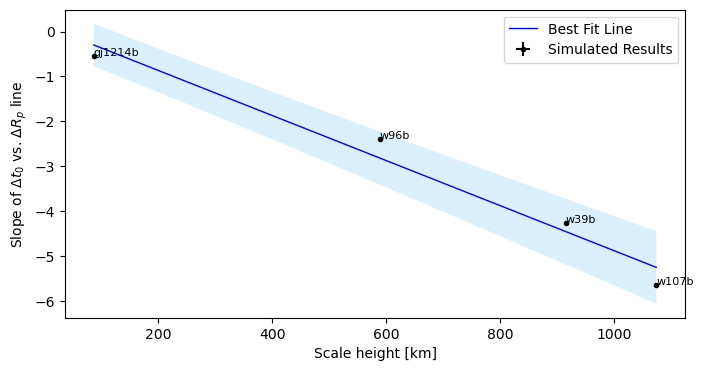

In [38]:
print('Best fit line: slope = m * H + b')
print('m = %.3f +/- %.3f'%(slopeH, slope_errH))
print('b = %.2f +/- %.2f'%(intcptH, intcpt_errH))

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x_fitH, y_fitH, c='blue', lw=1, alpha=1, label='Best Fit Line')
ax.fill_between(x_fitH, (y_fitH-yerr_fitH), (y_fitH+yerr_fitH), facecolor='lightskyblue', alpha=0.3)
ax.errorbar(scaleheights, slopes, xerr=scaleheight_errs, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(scaleheights[i], slopes[i], label, fontsize=8)
ax.set(xlabel='Scale height [km]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.savefig('analysis_figures/slopeH_plot.png', dpi=350, bbox_inches='tight')
plt.show()

Planets with smaller scale heights have shallower slopes in the $\Delta t_0$ vs. $\Delta R_p$ relationship, shown in the previous figure. A shallower slope means that, for a given limb asymmetry size, the current transit time needs to be known to tighter precision. 